In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
haber = pd.read_csv(r'C:\Users\NIKHIL\Desktop\applied ai\habberman\haberman.csv')

In [27]:
haber.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [28]:
haber['status'] = haber['status'].map({1:"yes", 2:"no"}) #

In [29]:
haber.tail()

,age,year,nodes,status
301,75,62,1,yes
302,76,67,0,yes
303,77,65,3,yes
304,78,65,1,no
305,83,58,2,no


In [8]:
print(haber.shape)

(306, 4)


In [9]:
print (haber.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


# High Level Statistics

In [10]:
haber.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# Observation
The age of the patients vary from 30 to 83 with the median of 52.
Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes 

In [11]:
haber["status"].value_counts()

yes    225
no      81
Name: status, dtype: int64

# Univaraite analysis(PDF, CDF, Boxplot, Voilin plots)

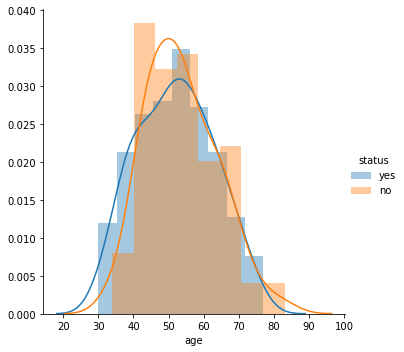

C:\Users\NIKHIL\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


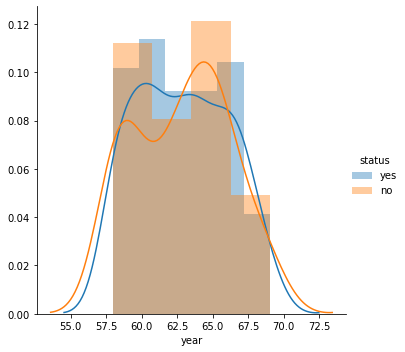

C:\Users\NIKHIL\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


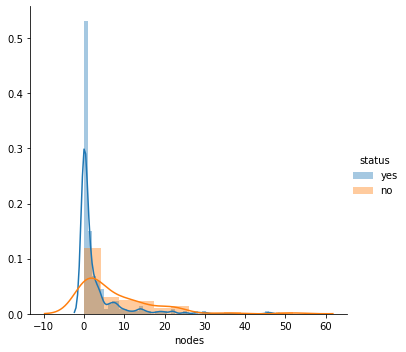

In [13]:
for idx, feature in enumerate(list(haber.columns)[:-1]):
    fg = sns.FacetGrid(haber, hue='status', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

# Observation:
here patient who has node value 0 will survive.The number of positive lymph nodes of the survivors is highly densed from 0 to 5.

# PDF & CDF plots for all features

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


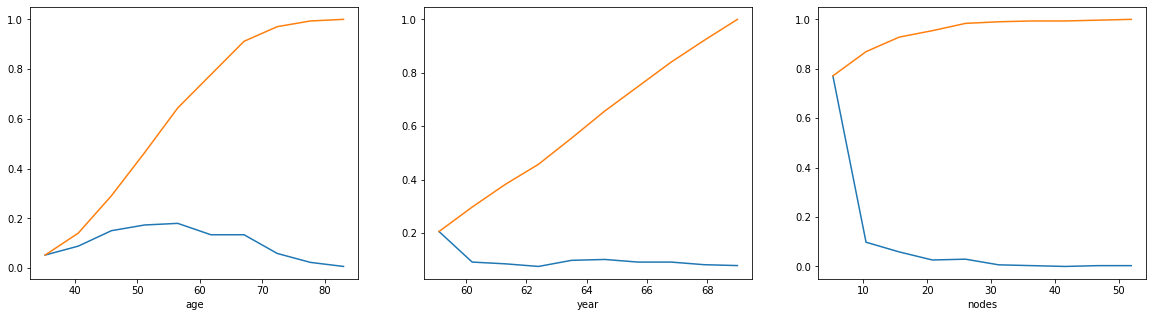

In [18]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(haber.columns)[:-1]):
    
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    
    counts, bin_edges = np.histogram(haber[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))   
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))    
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)


OBSERVATION:
In the above plots, the blue line indicates PDF. The orange line indicates CDF for all data points.
From the PDF plot, we can see that almost 80% of the patients have positive lymph nodes less than 10.

# Boxplot


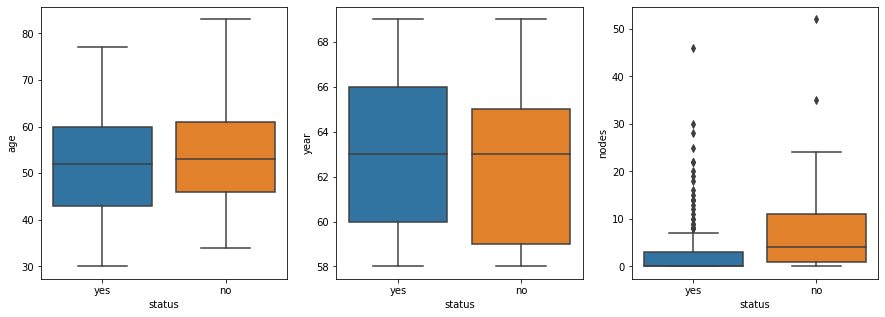

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haber.columns)[:-1]):
    sns.boxplot( x='status', y = feature, 
                 data=haber, ax=axes[idx])
plt.show()

# voilin plot

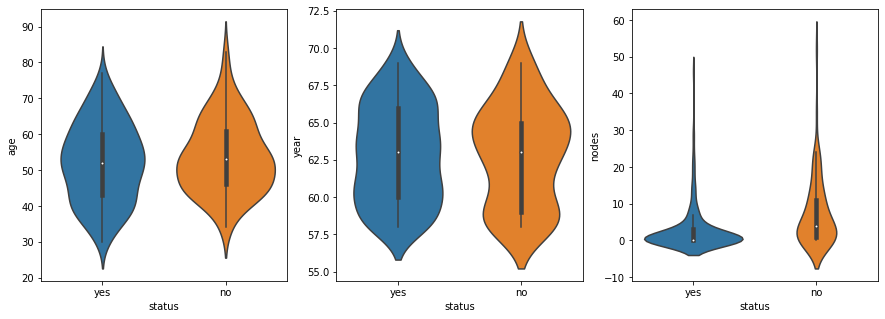

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haber.columns)[:-1]):
    sns.violinplot( x='status', y = feature, 
                 data=haber, ax=axes[idx])
plt.show()

# Observation from Box and Voilin Plot
The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.

#  Bi-variate analysis (scatter plots, pair-plots)

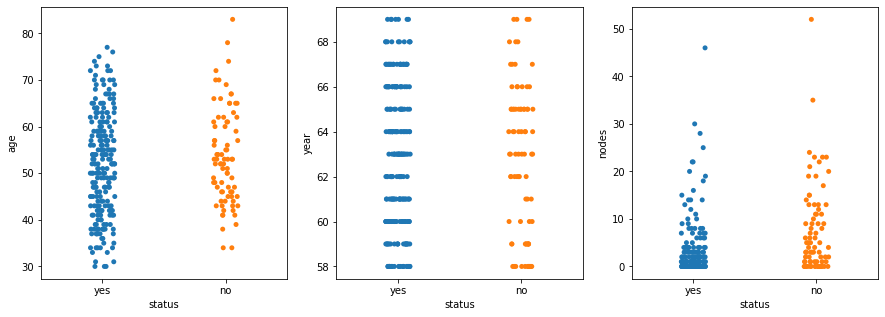

In [33]:
# 1D- Scatter Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haber.columns)[:-1]):
    sns.stripplot( x='status', y=feature, 
                   data=haber, ax=axes[idx], jitter=True)
plt.show()

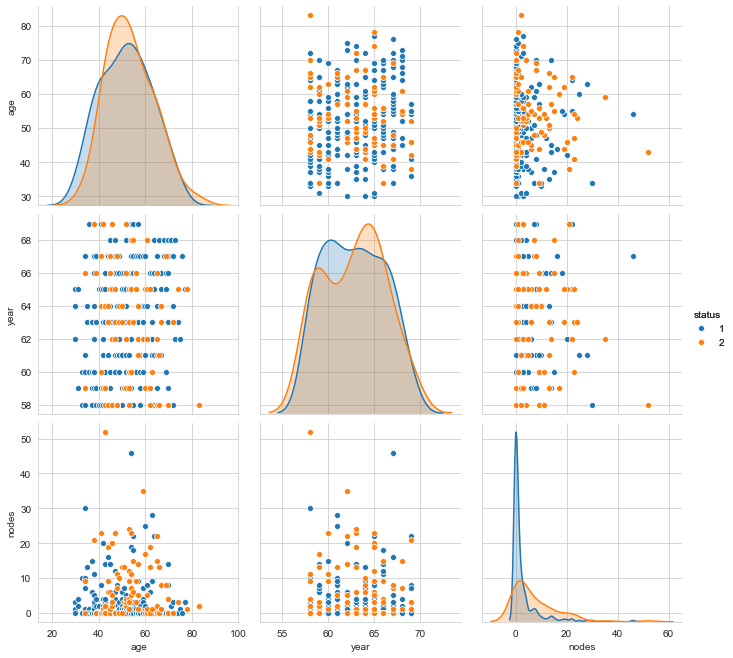

In [31]:
#PairPlot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haber, hue="status", height=3).add_legend();
plt.show()

# OBSERVATION
 Except from nodes to nodes plot, all combination of pair plots are highly overlapped with each other.

# Final Obseravtion:
Dataset is imbalanced . 
Attribute Nodes is much better choice for patient status classification.
